# Preprocessing

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase

In [4]:
data=pd.read_csv('../data/input_pilot_data.csv')
df=data.copy()
df.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915

In [5]:
df.describe()

Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  4149.000000  4149.000000  4149.000000  4149.000000  4149.000000   
mean      4.503254  2906.867438    64.933985     0.659566     4.402484   
std       2.474324   133.300164    30.302530     0.252703     5.274947   
min       1.000000  2573.500000    10.149000    -0.025949   -21.832000   
25%       2.000000  2821.500000    44.730000     0.498000     1.600000   
50%       4.000000  2932.500000    64.990000     0.639000     4.300000   
75%       6.000000  3007.000000    79.438000     0.822000     7.500000   
max       9.000000  3138.000000   361.150000     1.800000    19.312000   

             PHIND           PE         NM_M       RELPOS  
count  4149.000000  3232.000000  4149.000000  4149.000000  
mean     13.201066     3.725014     1.518438     0.521852  
std       7.132846     0.896152     0.499720     0.286644  
min       0.550000     0.200000     1.000000     0.000000  
25%       8.500000     3.100000     1.000000     0.277000  
50%      12.020000     3.551500     2.000000     0.528000  
75%      16.050000     4.300000     2.000000     0.769000  
max      84.400000     8.094000     2.000000     1.000000

In [6]:
df.columns  

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [7]:
for item in df['Well Name'].unique():
    print(item, len(df['Well Name'][df['Well Name']==item]))

SHRIMPLIN 471
ALEXANDER D 466
SHANKLE 449
LUKE G U 461
KIMZEY A 439
CROSS H CATTLE 501
NOLAN 415
Recruit F9 80
NEWBY 463
CHURCHMAN BIBLE 404


In [8]:
df[df['Well Name']=='ALEXANDER D'].head()

Facies Formation    Well Name   Depth     GR  ILD_log10  DeltaPHI  \
471       3     A1 SH  ALEXANDER D  2887.5  88.71      0.612       6.7   
472       3     A1 SH  ALEXANDER D  2888.0  92.71      0.583      11.0   
473       3     A1 SH  ALEXANDER D  2888.5  94.54      0.579      12.0   
474       3     A1 SH  ALEXANDER D  2889.0  95.31      0.579      11.5   
475       3     A1 SH  ALEXANDER D  2889.5  93.79      0.572      10.3   

      PHIND  PE  NM_M  RELPOS  
471  10.605 NaN     1   1.000  
472  12.515 NaN     1   0.974  
473  13.410 NaN     1   0.949  
474  13.750 NaN     1   0.923  
475  13.405 NaN     1   0.897

#  Keep well Church man bible as blind well for test

In [9]:
df["Well Name"].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [9]:
blind = df[df['Well Name'] == 'CHURCHMAN BIBLE']
df = df[df['Well Name'] != 'CHURCHMAN BIBLE']

# clean up data and change Well Name and formation as categorial data

df['Well Name'] = df['Well Name'].astype('category')
df['Formation'] = df['Formation'].astype('category')
df['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY']
Categories (9, object): ['ALEXANDER D', 'CROSS H CATTLE', 'KIMZEY A', 'LUKE G U', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [10]:
blind['Well Name'] = blind['Well Name'].astype('category')
blind.head()

Facies Formation        Well Name   Depth      GR  ILD_log10  DeltaPHI  \
3745       3     A1 SH  CHURCHMAN BIBLE  2917.5  63.500      0.705     4.916   
3746       3     A1 SH  CHURCHMAN BIBLE  2918.0  80.875      0.709     7.514   
3747       3     A1 SH  CHURCHMAN BIBLE  2918.5  87.813      0.700     7.785   
3748       3     A1 SH  CHURCHMAN BIBLE  2919.0  86.750      0.685     7.547   
3749       3     A1 SH  CHURCHMAN BIBLE  2919.5  79.438      0.669     5.912   

       PHIND     PE  NM_M  RELPOS  
3745  12.174  3.162     1    1.00  
3746  13.286  2.932     1    0.95  
3747  13.212  2.953     1    0.90  
3748  13.547  3.420     1    0.85  
3749  12.252  3.324     1    0.80

# Pair plot

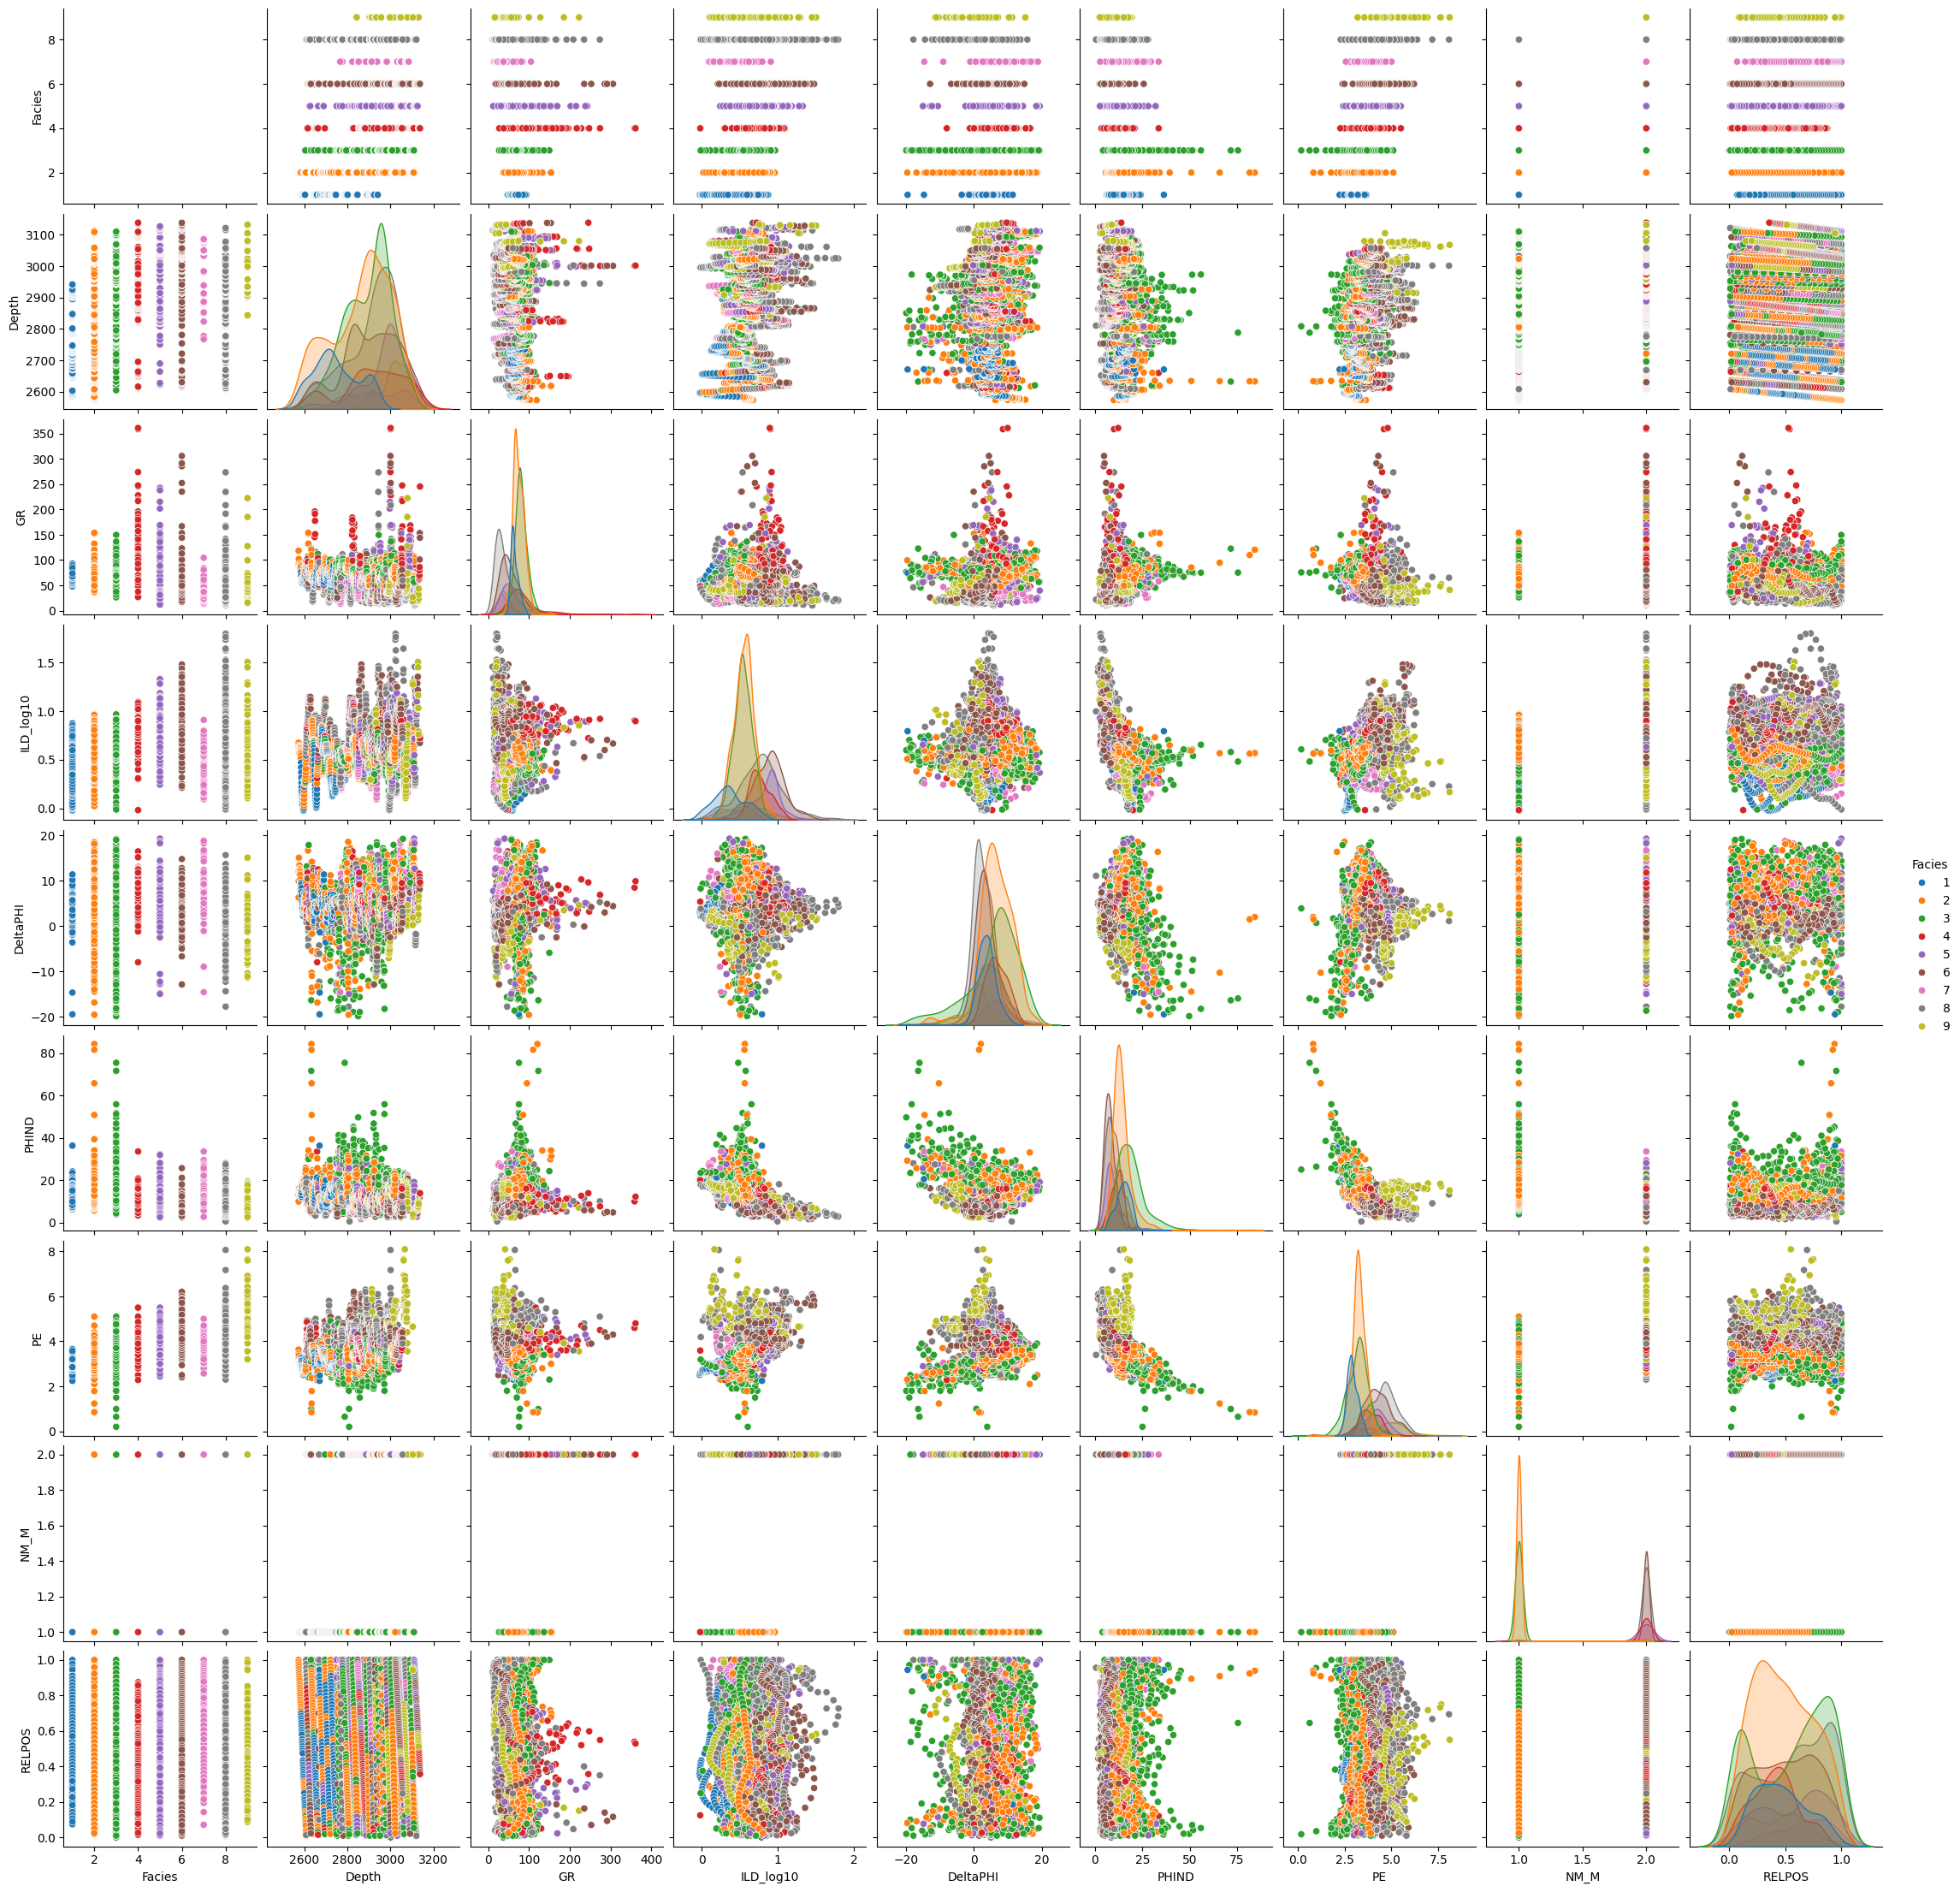

In [11]:
# Select only numeric columns for the pair plot
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Color by facies (replace 'Facies' with your actual facies column name if different)
sns.pairplot(df, vars=numeric_cols, hue="Facies", palette="tab10", diag_kind="kde")
plt.show()

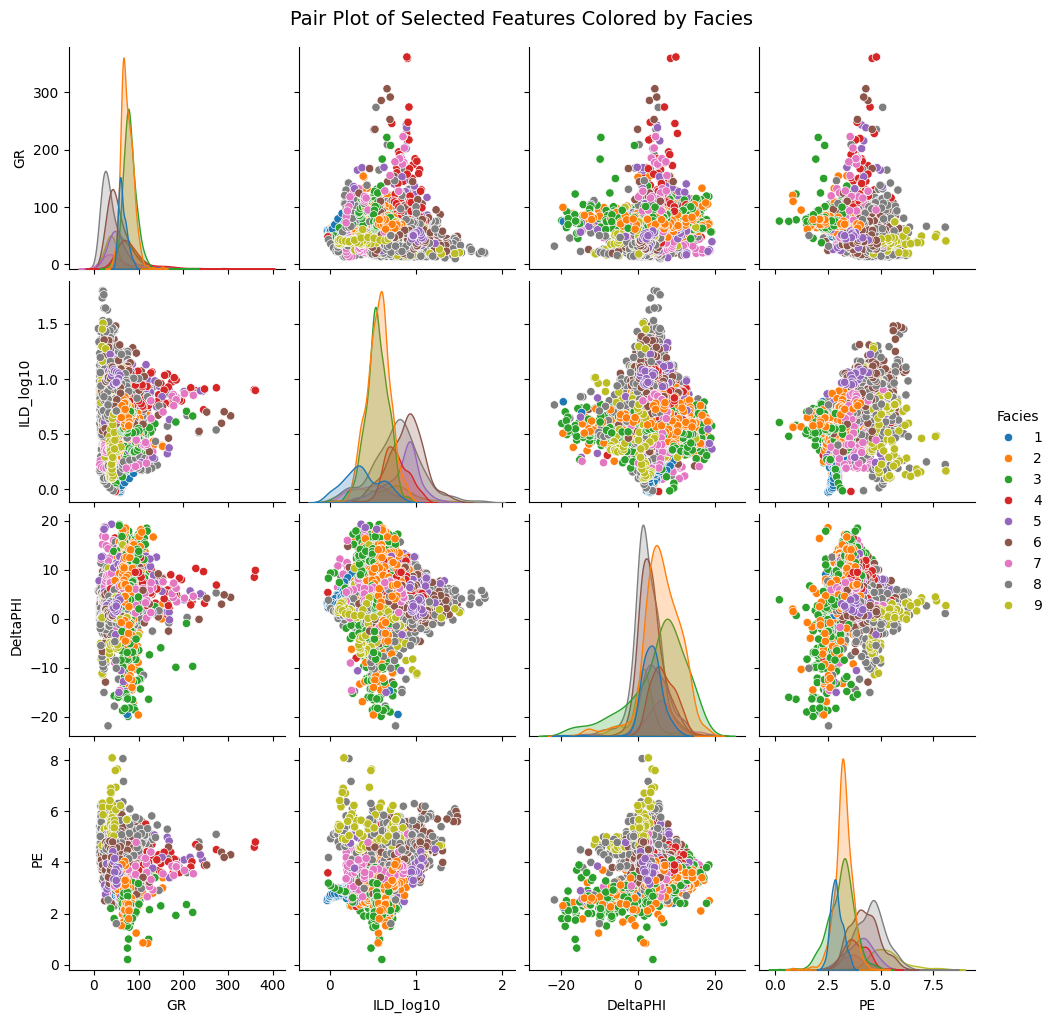

In [10]:

col_for_pairplot = ["GR", "ILD_log10", "DeltaPHI", "PE"]
pairplot = sns.pairplot(
    df,
    vars=col_for_pairplot,
    hue="Facies",
    palette="tab10",
    diag_kind="kde"
)
# Add title properly
pairplot.fig.suptitle(
    "Pair Plot of Selected Features Colored by Facies",
    y=1.02, fontsize=14
)
# Save the figure
pairplot.savefig("../figures/pair_plot.png", dpi=300, bbox_inches="tight")
plt.show()


# Box Plot and Half Violin plot

/tmp/ipykernel_1921/2145594006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1921/2145594006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1921/2145594006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1921/2145594006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


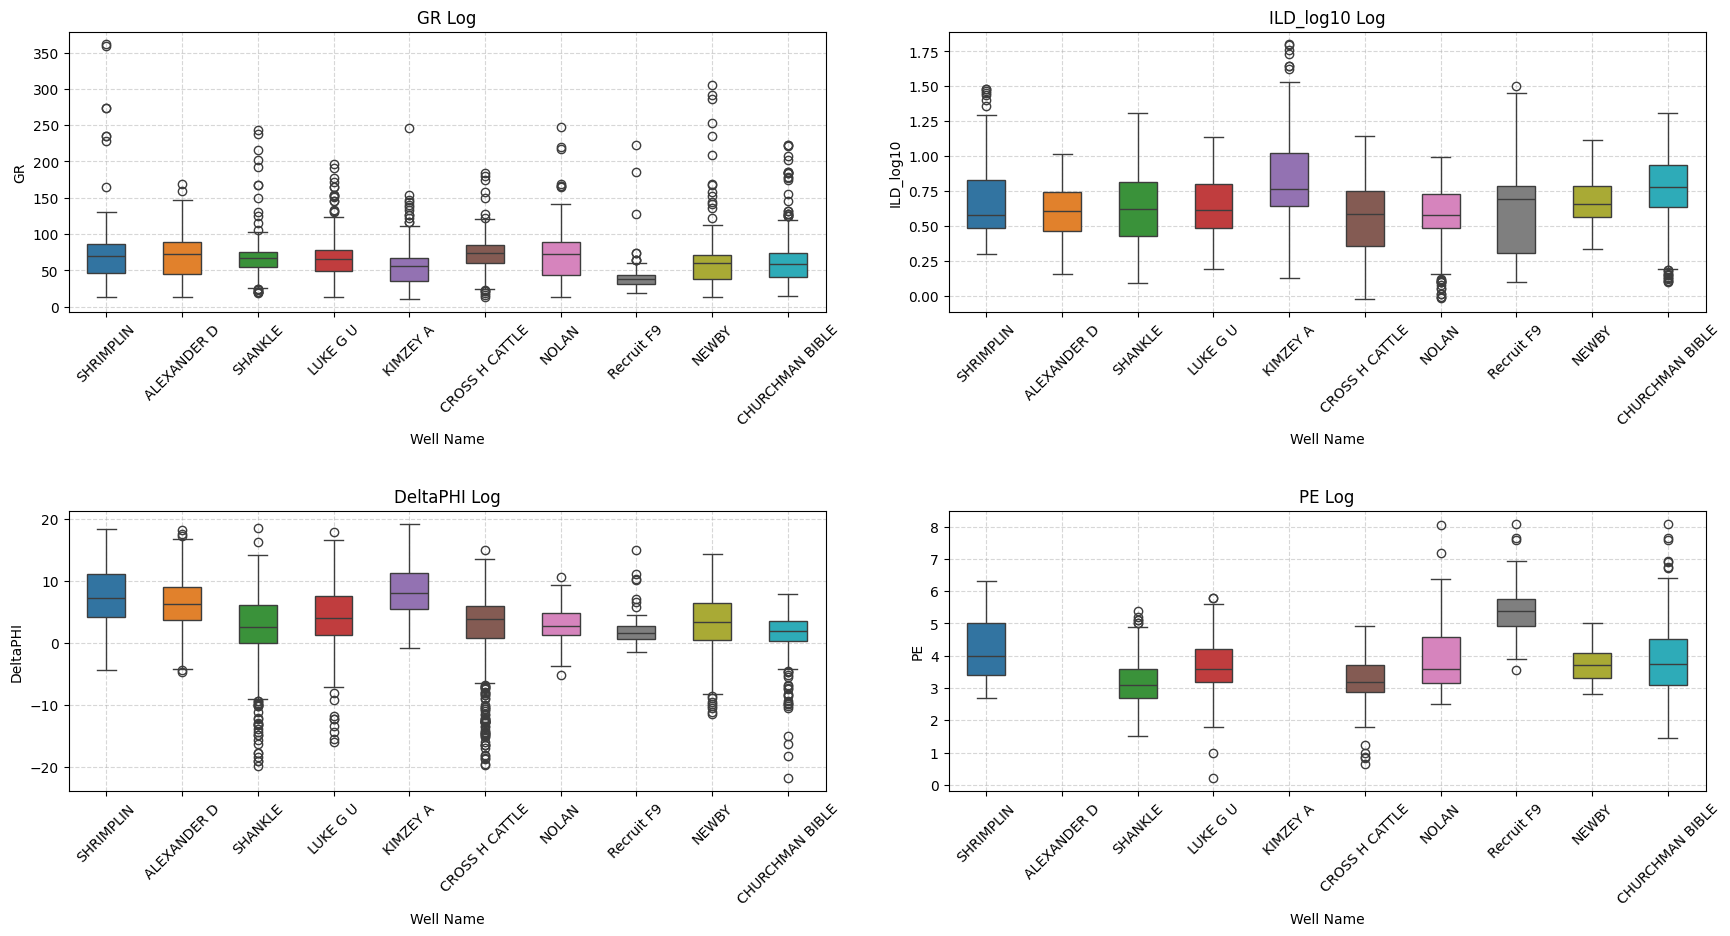

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["GR", "ILD_log10", "DeltaPHI", "PE"]
wells = df["Well Name"].unique()

plt.figure(figsize=(18, 10))  # Wider for more wells
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df,
        x="Well Name",
        y=col,
        palette="tab10",
        width=0.5  # Make boxes thinner for more gap
    )
    plt.title(f"{col} Log")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(pad=3.0)

# Save before showing
plt.savefig("../figures/well_logs_boxplots.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_1921/4005205375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1921/4005205375.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/tmp/ipykernel_1921/4005205375.py:9: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(
/tmp/ipykernel_1921/4005205375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1921/4005205375.py:9: FutureWarning: 


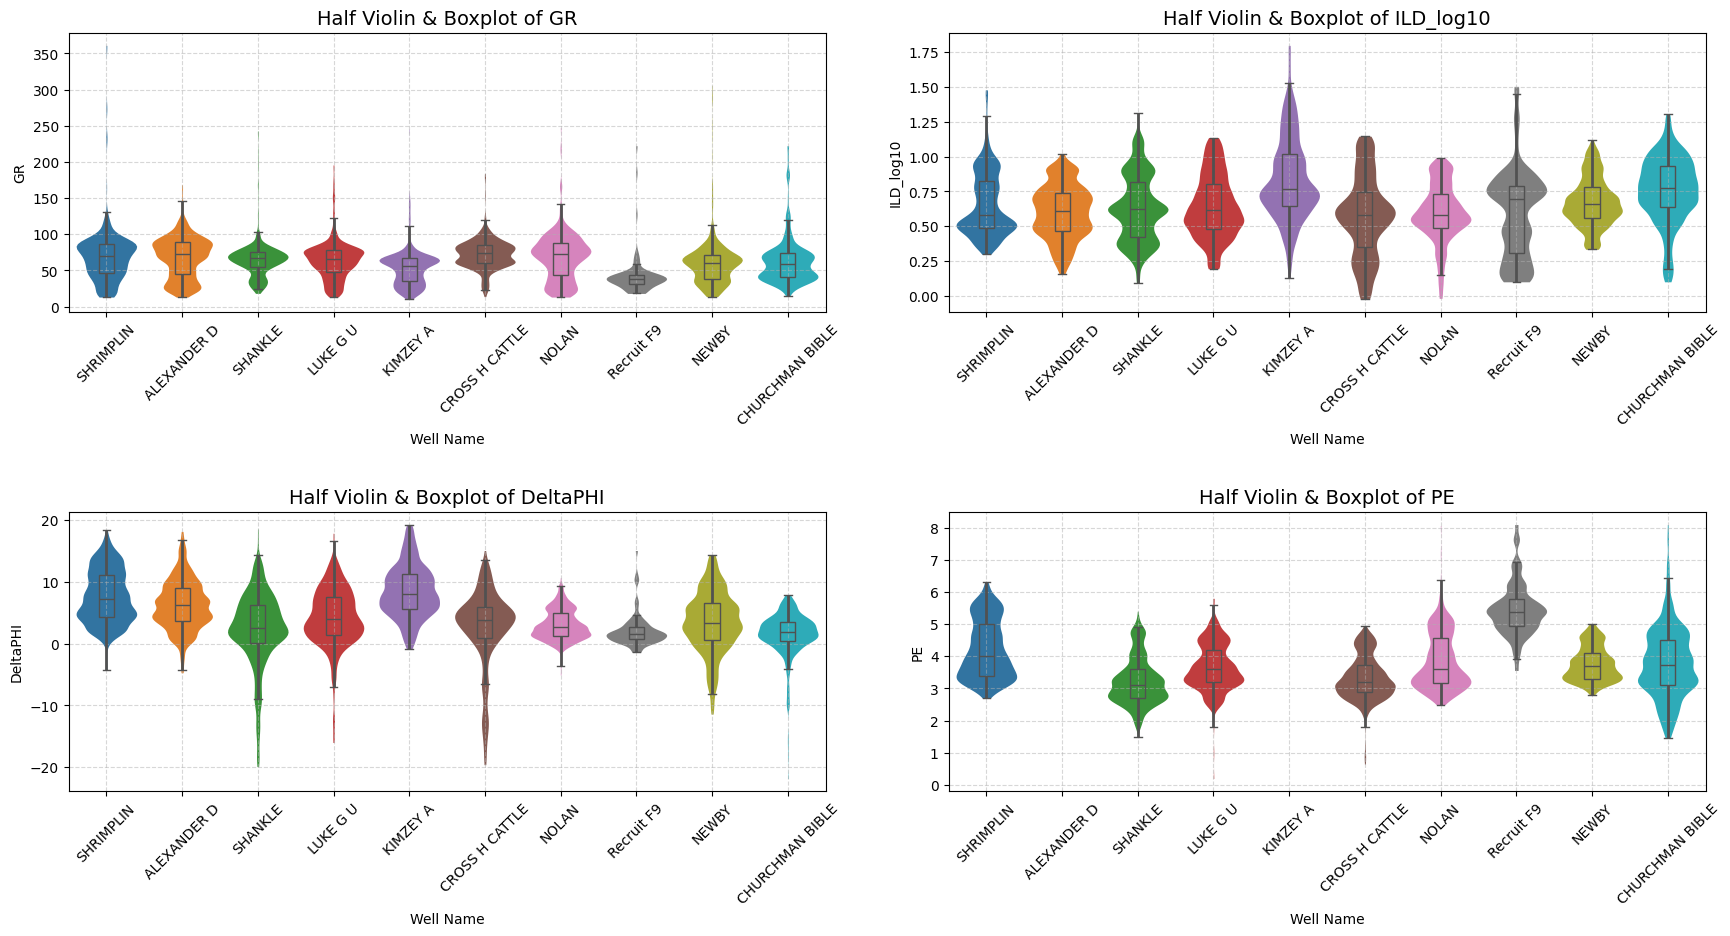

In [12]:
cols_for_violin = ["GR", "ILD_log10", "DeltaPHI", "PE"]

plt.figure(figsize=(18, 10))

for i, col in enumerate(cols_for_violin, 1):
    plt.subplot(2, 2, i)

    # Draw half violin plot (left side only)
    sns.violinplot(
        data=df,
        x="Well Name",
        y=col,
        palette="tab10",
        cut=0,
        inner=None,
        linewidth=0,
        bw=0.2,
        scale="width"
    )

    # Overlay boxplot
    sns.boxplot(
        data=df,
        x="Well Name",
        y=col,
        width=0.2,
        showcaps=True,
        boxprops={'facecolor': 'none', "zorder": 10},
        showfliers=False,
        whiskerprops={'linewidth': 2},
        zorder=10
    )

    plt.title(f"Half Violin & Boxplot of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(pad=3.0)
plt.savefig("../figures/violin-plot.png", dpi=300, bbox_inches="tight")

plt.show()


/tmp/ipykernel_1921/1742937580.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  v = sns.violinplot(
/tmp/ipykernel_1921/1742937580.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  v = sns.violinplot(
/tmp/ipykernel_1921/1742937580.py:14: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  v = sns.violinplot(
/tmp/ipykernel_1921/1742937580.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  v = sns.violinplot(
/tmp/ipykernel_1921/1742937580.py

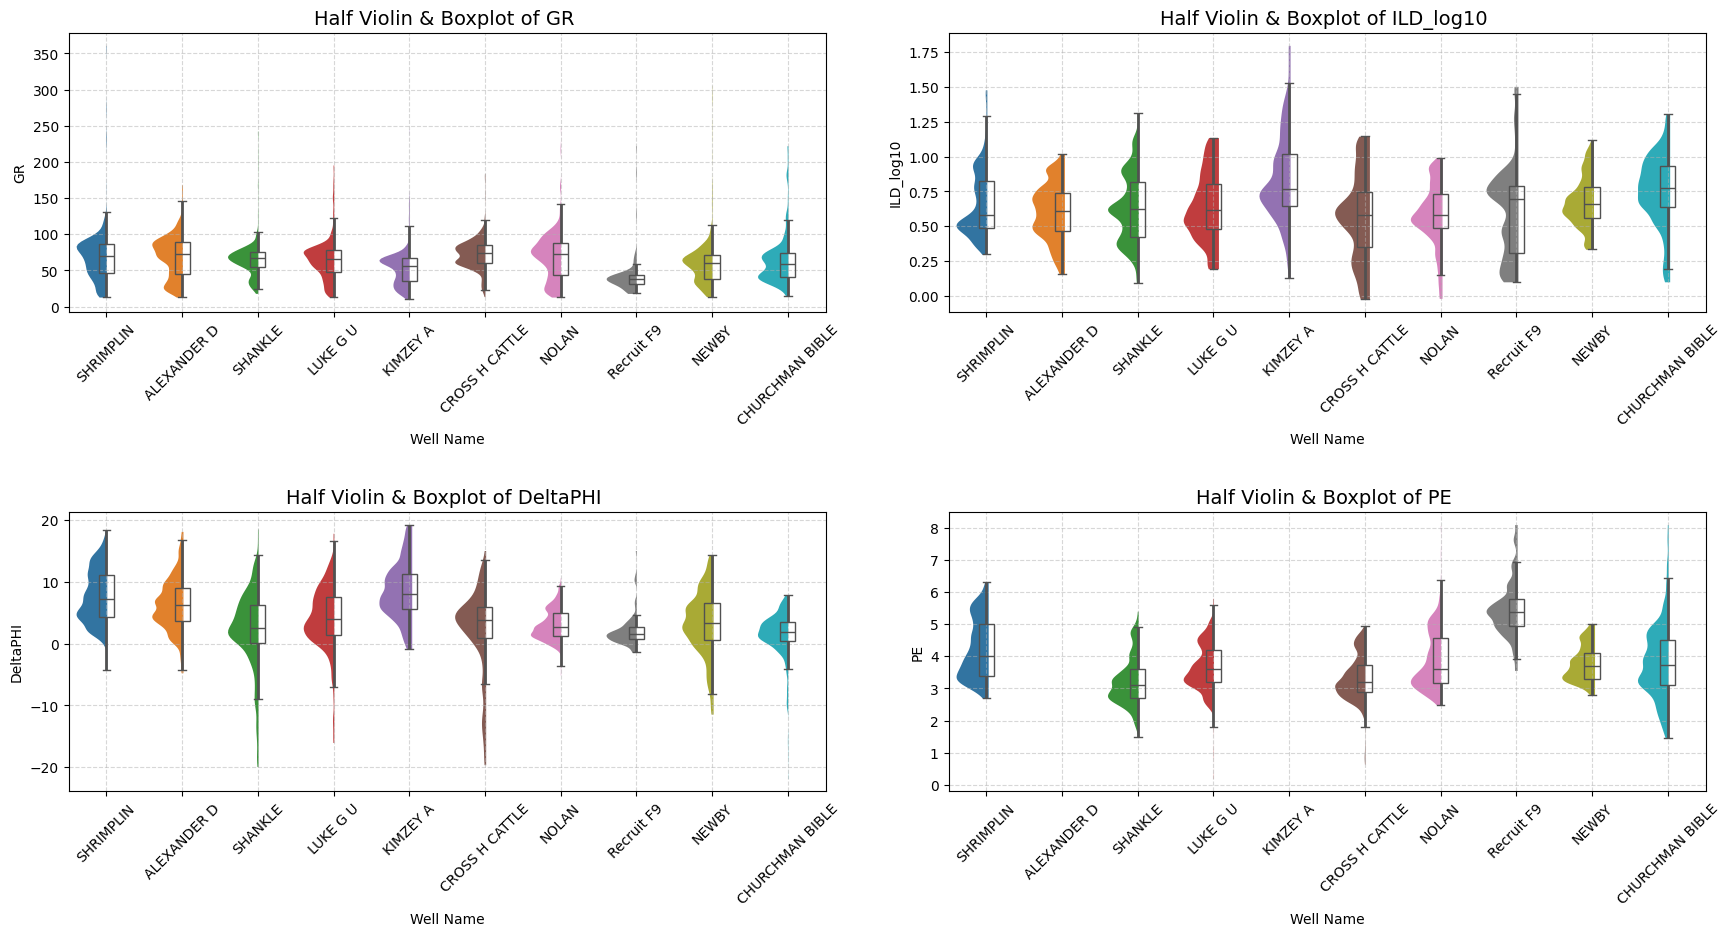

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.collections import PolyCollection

cols_for_violin = ["GR", "ILD_log10", "DeltaPHI", "PE"]

plt.figure(figsize=(18, 10))

for i, col in enumerate(cols_for_violin, 1):
    ax = plt.subplot(2, 2, i)

    # Draw violin
    v = sns.violinplot(
        data=df,
        x="Well Name",
        y=col,
        palette="tab10",
        cut=0,
        inner=None,
        linewidth=0,
        bw=0.2,
        scale="width",
        ax=ax
    )

    # Clip violin to left half only
    for art in ax.collections:
        if isinstance(art, PolyCollection):
            verts = art.get_paths()[0].vertices
            verts[:, 0] = np.minimum(verts[:, 0], np.median(verts[:, 0]))

    # Overlay boxplot
    sns.boxplot(
        data=df,
        x="Well Name",
        y=col,
        width=0.2,
        showcaps=True,
        boxprops={'facecolor': 'none', "zorder": 10},
        showfliers=False,
        whiskerprops={'linewidth': 2},
        zorder=10,
        ax=ax
    )

    ax.set_title(f"Half Violin & Boxplot of {col} ", fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(pad=3.0)
plt.savefig("../figures/half-violin-box-plot.png", dpi=300, bbox_inches="tight")

plt.show()


# Outlier detection

In [11]:
cols = ["GR", "ILD_log10", "DeltaPHI", "PE"]
well_ranges_df = df.groupby("Well Name")[cols].agg(['min', 'max']).reset_index()
display(well_ranges_df)

Well Name      GR          ILD_log10           DeltaPHI          \
                       min      max       min       max      min     max   
0      ALEXANDER D  13.340  168.430  0.155000  1.016000   -4.700  18.200   
1  CHURCHMAN BIBLE  14.469  222.500  0.100000  1.308000  -21.832   7.900   
2   CROSS H CATTLE  13.893  184.021 -0.025949  1.147027  -19.600  15.100   
3         KIMZEY A  10.149  245.360  0.127000  1.800000   -0.780  19.312   
4         LUKE G U  13.530  195.890  0.194000  1.137000  -16.000  17.900   
5            NEWBY  13.920  305.870  0.334000  1.118000  -11.400  14.400   
6            NOLAN  13.250  247.500 -0.019000  0.992000   -5.054  10.693   
7       Recruit F9  18.297  222.500  0.100000  1.505000   -1.420  15.100   
8          SHANKLE  18.400  242.750  0.093000  1.311000  -19.900  18.600   
9        SHRIMPLIN  13.280  361.150  0.297000  1.480000   -4.300  18.500   

      PE         
     min    max  
0    NaN    NaN  
1  1.465  8.094  
2  0.646  4.925  
3    NaN    NaN  
4  0.200  5.800  
5  2.800  5.000  
6  2.498  8.063  
7  3.557  8.094  
8  1.500  5.400  
9  2.700  6.300

# Isolation forest

# https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562/

#### https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562/

In [7]:
from sklearn.ensemble import IsolationForest


In [11]:
anomaly_input=["GR", "ILD_log10", "DeltaPHI", "PE"]


In [12]:
model_IF=IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_input])

df['anomaly_scores']=model_IF.decision_function(df[anomaly_input])
df['anomaly']=model_IF.predict(df[anomaly_input])

/tmp/ipykernel_2078/1378454680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly_scores']=model_IF.decision_function(df[anomaly_input])
/tmp/ipykernel_2078/1378454680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly']=model_IF.predict(df[anomaly_input])


In [13]:
df.loc[:, ['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'anomaly_scores', 'anomaly']].head(10)

GR  ILD_log10  DeltaPHI   PE  anomaly_scores  anomaly
0  77.45      0.664       9.9  4.6        0.062509        1
1  78.26      0.661      14.2  4.1        0.043664        1
2  79.05      0.658      14.8  3.6        0.066526        1
3  86.10      0.655      13.9  3.5        0.066612        1
4  74.58      0.647      13.5  3.4        0.083267        1
5  73.97      0.636      14.0  3.6        0.075467        1
6  73.72      0.630      15.6  3.7        0.057989        1
7  75.65      0.625      16.5  3.5        0.049256        1
8  73.79      0.624      16.2  3.4        0.049522        1
9  76.89      0.615      16.9  3.5        0.044840        1

In [14]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 324
Number of non anomalous values  2908
Total Number of Values: 3232


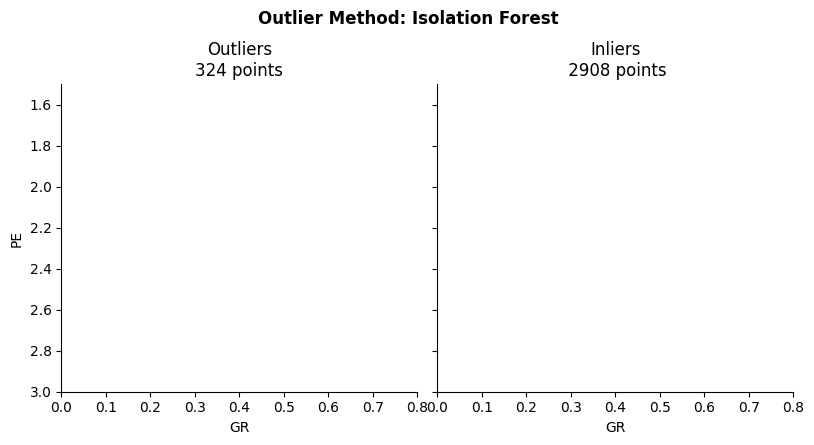

In [17]:
outlier_plot(df, 'Isolation Forest', "GR", "PE", [0, 0.8], [3, 1.5]);

# Plot for the well Luke G U and Well Shankle


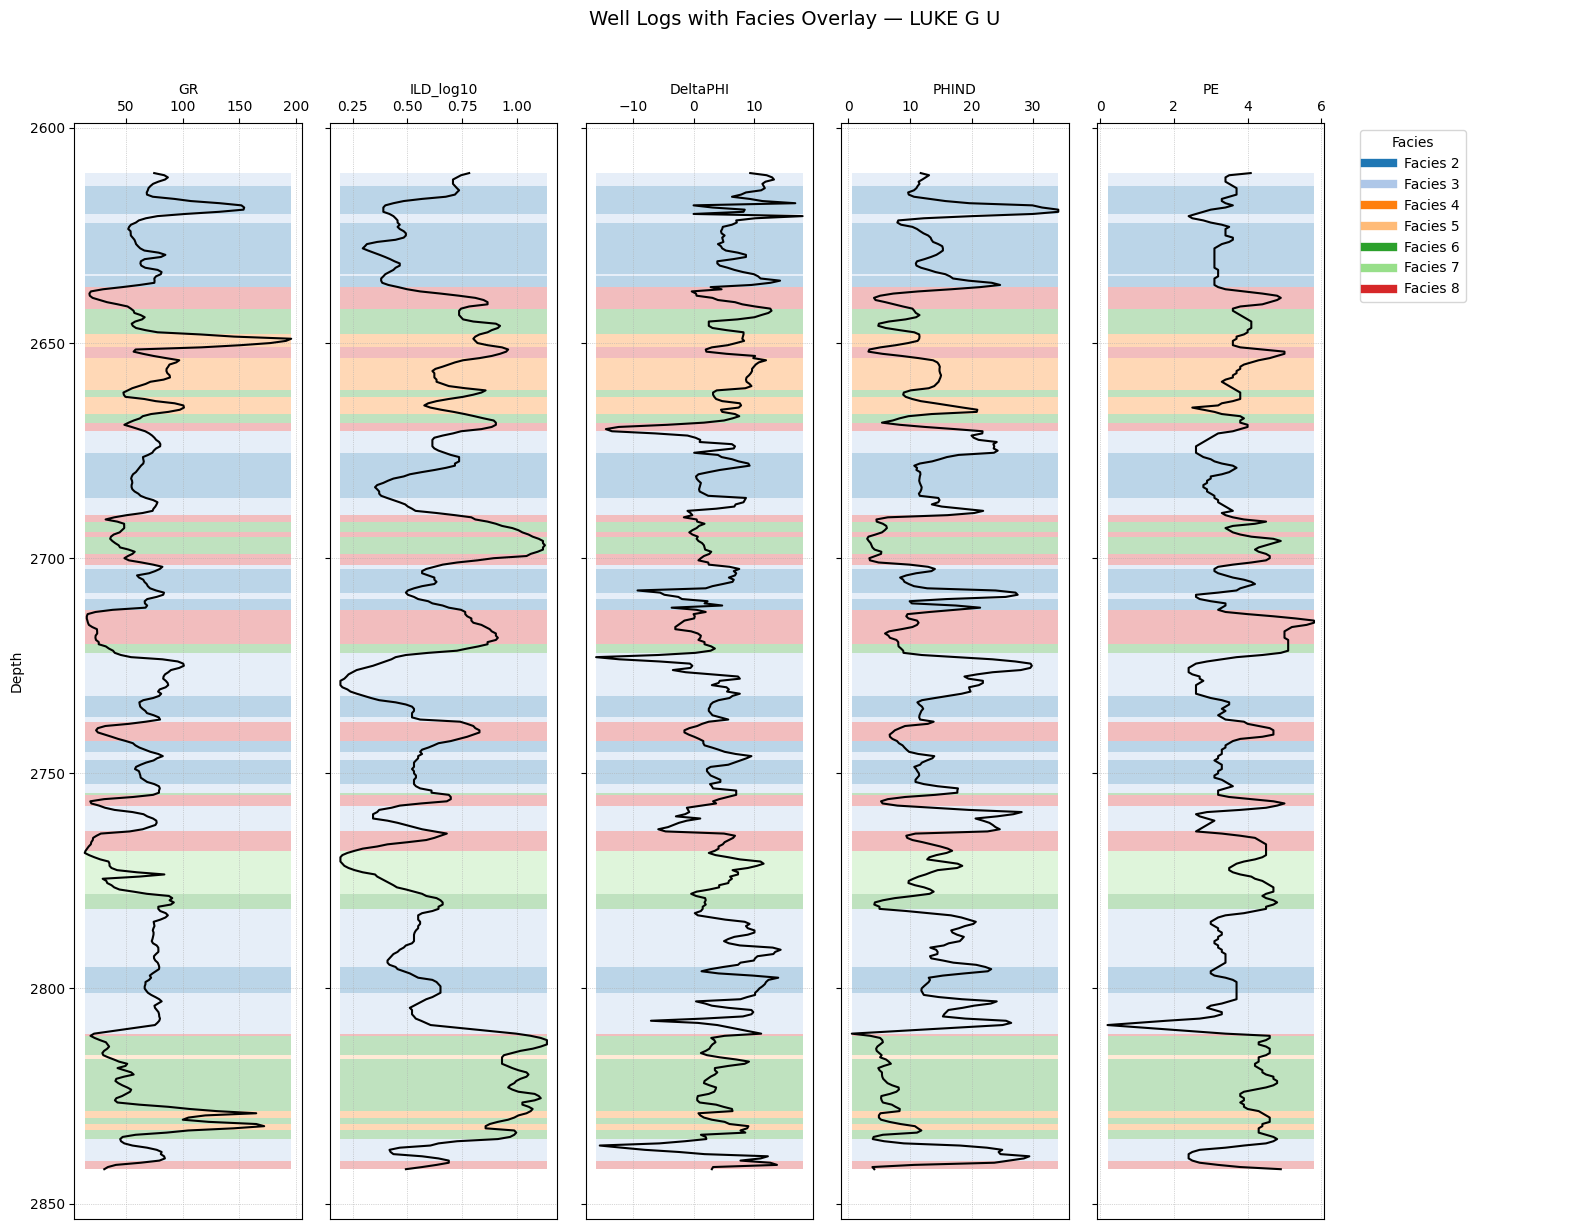

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_well_with_facies(
    df,
    well_name,
    log_cols=("GR","ILD_log10","DeltaPHI","PHIND","PE"),
    cmap_name="tab20",
    alpha=0.3,
    global_facies=None,   # pass a sorted array of all facies in your dataset to keep colors consistent across wells
):
    # 1) select well & clean
    df = df[df['Well Name'] == well_name].copy()
    if df.empty:
        raise ValueError(f"Well '{well_name}' not found in training_data.")
    df = df.dropna(subset=list(log_cols)+['Facies','Depth']).sort_values('Depth')

    # 2) preserve original facies integers (no recoding!)
    df['Facies'] = df['Facies'].astype(int)

    depth = df['Depth'].to_numpy()
    facies_seq = df['Facies'].to_numpy()

    # 3) choose which facies set to color-map
    if global_facies is None:
        unique_facies = np.sort(df['Facies'].unique())
    else:
        unique_facies = np.array(sorted(set(int(x) for x in global_facies)))
    facies_to_idx = {f: i for i, f in enumerate(unique_facies)}

    # 4) build colors
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(len(unique_facies))]

    # 5) plot
    n_logs = len(log_cols)
    fig, axes = plt.subplots(1, n_logs + 1, figsize=(2.8 * n_logs + 2, 12), sharey=True)

    for i, col in enumerate(log_cols):
        ax = axes[i]
        values = df[col].to_numpy()
        vmin, vmax = np.nanmin(values), np.nanmax(values)

        # facies color bands between consecutive depth samples
        for j in range(len(df) - 1):
            fcode = facies_seq[j]
            ax.fill_betweenx(
                [depth[j], depth[j + 1]],
                vmin, vmax,
                color=colors[facies_to_idx[fcode]],
                alpha=alpha,
                linewidth=0
            )

        ax.plot(values, depth, 'k-')
        ax.set_xlabel(col)
        ax.invert_yaxis()
        ax.grid(True, linestyle=':', linewidth=0.5)
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('top')

    axes[0].set_ylabel("Depth")

    # legend uses the actual numeric codes
    handles = [
        plt.Line2D([0], [0], color=colors[facies_to_idx[f]], lw=6, label=f"Facies {f}")
        for f in unique_facies
    ]
    axes[-1].legend(handles=handles, loc='upper left', fontsize=10, title="Facies")
    axes[-1].axis('off')

    fig.suptitle(f"Well Logs with Facies Overlay — {well_name}", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig(f"../figures/well_logs_with-facies-overlay-{well_name}.png", dpi=300, bbox_inches="tight")

    plt.show()

# --- usage ---
# Option A: per-well color set
plot_well_with_facies(df, well_name='LUKE G U')

# Option B (recommended): consistent colors across all wells
# all_f = np.sort(training_data['Facies'].dropna().astype(int).unique())
# plot_well_with_facies(training_data, well_name='LUKE G U', global_facies=all_f)



# Feature Engineering

PHID (Density Porosity), derived using PHIND and DeltaPHI from the dataset:  

$$
\Phi_D = \frac{1}{2} \left( 2\Phi_{ND} - \Delta \Phi \right)
$$

NPHI (Neutron Porosity), derived using PHIND and DeltaPHI:  

$$
\Phi_N = \frac{1}{2} \left( 2\Phi_{ND} + \Delta \Phi \right)
$$

Volume of shale:  

$$
V_{sh} = \frac{GR - GR_{sand}}{GR_{shale} - GR_{sand}}
$$

Bulk density:  

$$
\rho_g = \left( 1 - \frac{\phi_{ND}}{100} \right) \cdot \rho_{matrix} + \left( \frac{\phi_{ND}}{100} \right) \cdot \rho_{fluid}
$$


In [17]:
phid=0.5*( 2*df['PHIND']-df['DeltaPHI'] )
df['PHID'] = phid

# NPHI
phin= (0.5)*(2*df['PHIND'] + df['DeltaPHI'])
df['NPHI'] = phin

# Volume of shale
vsh = (df['GR'] - df['GR'].min()) / (df['GR'].max() - df['GR'].min())
df['VSH'] = vsh

# Bulk density
rho_matrix = 2.65  # g/cm^3 for sandstone
rho_fluid = 1.0  # g/cm^3 for water
# Calculate bulk density using PHIND
bd = (1-(df['PHIND'])/100) *rho_matrix+((df["PHIND"])/100) *rho_fluid
df['Bulk Density'] = bd

df[['PHID', 'NPHI',"VSH","Bulk Density"]].describe()


PHID         NPHI          VSH  Bulk Density
count  4149.000000  4149.000000  4149.000000   4149.000000
mean     10.999824    15.402308     0.156082      2.432182
std       8.059673     7.121038     0.086332      0.117692
min      -5.000000     2.090000     0.000000      1.257400
25%       6.259000    10.025000     0.098521      2.385175
50%       8.900000    14.842000     0.156242      2.451670
75%      13.165000    19.385000     0.197404      2.509750
max      83.500000    85.400000     1.000000      2.640925

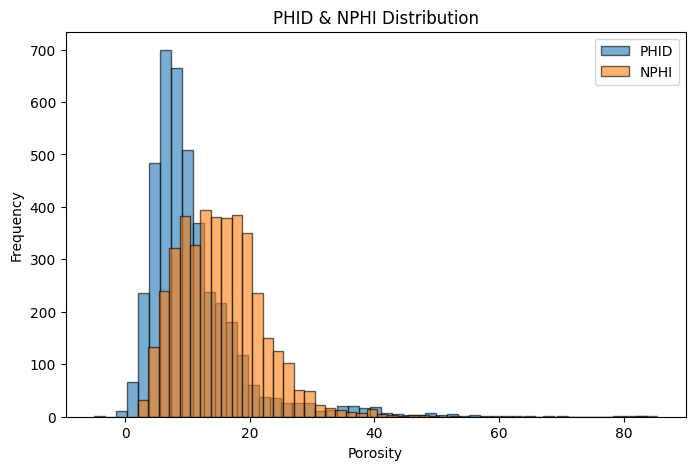

In [18]:
# Plot both on the same histogram
plt.figure(figsize=(8, 5))
plt.hist(df['PHID'], bins=50, edgecolor='black', alpha=0.6, label='PHID')
plt.hist(df['NPHI'], bins=50, edgecolor='black', alpha=0.6, label='NPHI')

plt.title("PHID & NPHI Distribution")
plt.xlabel("Porosity")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(f"../figures/PHID AND NPHI Distribution.png", dpi=300, bbox_inches="tight")

plt.show()


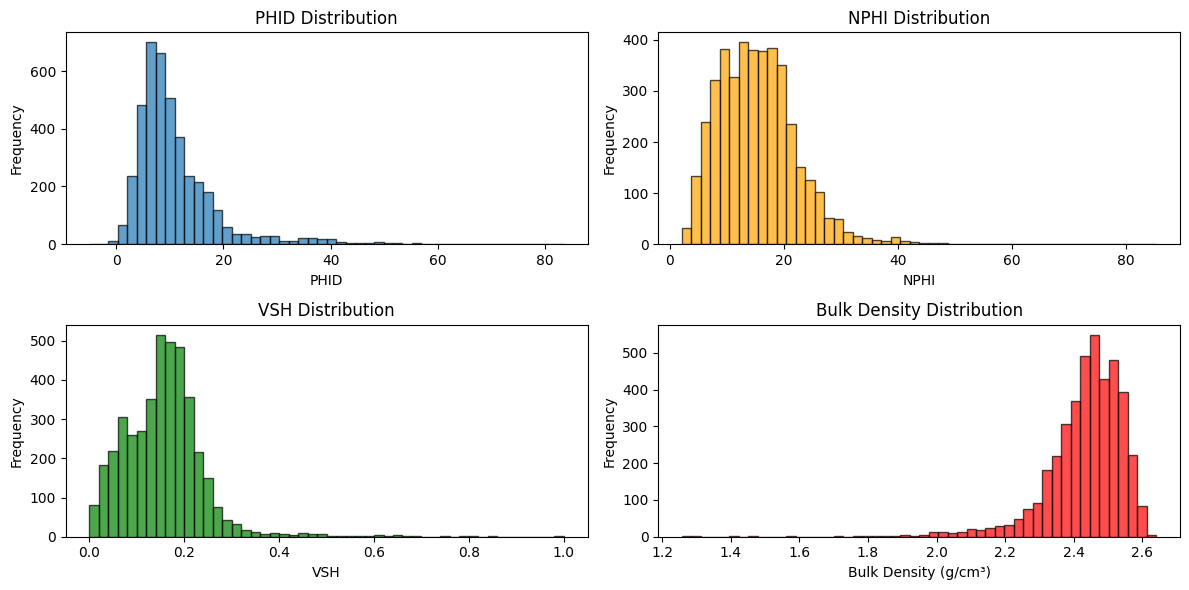

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

# PHID histogram
axes[0].hist(df['PHID'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title("PHID Distribution")
axes[0].set_xlabel("PHID")
axes[0].set_ylabel("Frequency")

# NPHI histogram
axes[1].hist(df['NPHI'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title("NPHI Distribution")
axes[1].set_xlabel("NPHI")
axes[1].set_ylabel("Frequency")

# VSH histogram
axes[2].hist(df['VSH'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_title("VSH Distribution")
axes[2].set_xlabel("VSH")
axes[2].set_ylabel("Frequency") 

# Bulk Density histogram
axes[3].hist(df['Bulk Density'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[3].set_title("Bulk Density Distribution")
axes[3].set_xlabel("Bulk Density (g/cm³)")
axes[3].set_ylabel("Frequency") 

plt.tight_layout()
plt.savefig(f"../figures/Histogram.png", dpi=300, bbox_inches="tight")

plt.show()

# Missing PE

In [14]:
df.isnull().sum()

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
ILD_log10      0
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
dtype: int64

In [20]:
is_pe_missing = df['PE'].isnull()

# Filter the DataFrame to get only the rows with missing PE
df_missing_pe = df[is_pe_missing]

# Get the unique well names from this filtered DataFrame
wells_with_missing_pe = df_missing_pe['Well Name'].unique()

print(f"The PE log is missing in the following wells:")
print(list(wells_with_missing_pe))


The PE log is missing in the following wells:
['ALEXANDER D', 'KIMZEY A', 'Recruit F9']


## So the PE is missing in well 'ALEXANDER D', 'KIMZEY A', 'Recruit F9'

In [21]:
df_missing_pe.head()

Facies Formation    Well Name   Depth     GR  ILD_log10  DeltaPHI  \
471       3     A1 SH  ALEXANDER D  2887.5  88.71      0.612       6.7   
472       3     A1 SH  ALEXANDER D  2888.0  92.71      0.583      11.0   
473       3     A1 SH  ALEXANDER D  2888.5  94.54      0.579      12.0   
474       3     A1 SH  ALEXANDER D  2889.0  95.31      0.579      11.5   
475       3     A1 SH  ALEXANDER D  2889.5  93.79      0.572      10.3   

      PHIND  PE  NM_M  RELPOS   PHID    NPHI       VSH  Bulk Density  
471  10.605 NaN     1   1.000  7.255  13.955  0.223820      2.475018  
472  12.515 NaN     1   0.974  7.015  18.015  0.235216      2.443503  
473  13.410 NaN     1   0.949  7.410  19.410  0.240430      2.428735  
474  13.750 NaN     1   0.923  8.000  19.500  0.242623      2.423125  
475  13.405 NaN     1   0.897  8.255  18.555  0.238293      2.428818

### Short the well in which PE is available

In [22]:

df_pe_present = df[~df['Well Name'].isin(wells_with_missing_pe)].copy()
print("\nWells included in the new 'df_pe_present' DataFrame:")
print(list(df_pe_present['Well Name'].unique()))
print(f"\nMissing PE values in df_pe_pred: {df_pe_present['PE'].isnull().sum()}")



Wells included in the new 'df_pe_present' DataFrame:
['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN', 'NEWBY', 'CHURCHMAN BIBLE']

Missing PE values in df_pe_pred: 0


In [23]:
df_pe_present.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS   PHID    NPHI       VSH  Bulk Density  
0  4.6     1   1.000  6.965  16.865  0.191740      2.453402  
1  4.1     1   0.979  5.465  19.665  0.194048      2.442677  
2  3.6     1   0.957  5.650  20.450  0.196299      2.434675  
3  3.5     1   0.936  6.165  20.065  0.216384      2.433602  
4  3.4     1   0.915  6.550  20.050  0.183564      2.430550

## For this we have to calculate Pearson coefficient to see the weigtage of different cols 

In [24]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH',
       'Bulk Density'],
      dtype='object')

In [25]:
col_for_pe = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
corr = df[col_for_pe + ["PE"]].corr()

# Show correlation of each log with PEtest_set_df=df1.loc[temp_list.astype(int)]
print("Pearson correlation with PE:")
print(corr["PE"].drop("PE"))

Pearson correlation with PE:
                 PE        PE
Facies     0.704231  0.704231
Depth      0.277577  0.277577
GR        -0.289023 -0.289023
ILD_log10  0.384589  0.384589
DeltaPHI   0.011489  0.011489
PHIND     -0.573418 -0.573418
NM_M       0.657089  0.657089
RELPOS     0.018905  0.018905


<Figure size 600x400 with 0 Axes>

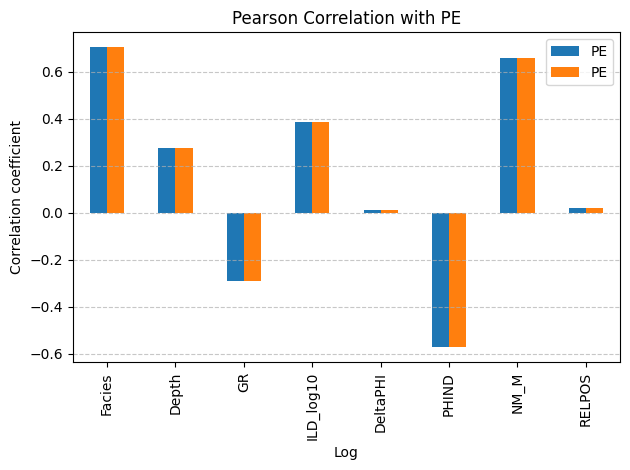

In [26]:
# Plot correlation as bar plot
plt.figure(figsize=(6, 4))
corr["PE"].drop("PE").plot(kind='bar')
plt.title("Pearson Correlation with PE")
plt.ylabel("Correlation coefficient")
plt.xlabel("Log")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH',
       'Bulk Density'],
      dtype='object')

In [27]:
col_for_pe = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS','NPHI','VSH', 'Bulk Density']
corr = df[col_for_pe + ["PE"]].corr()

# Show correlation of each log with PE
print("Pearson correlation with PE:")
print(corr["PE"].drop("PE"))

Pearson correlation with PE:
                    PE        PE
Facies        0.704231  0.704231
Depth         0.277577  0.277577
GR           -0.289023 -0.289023
ILD_log10     0.384589  0.384589
DeltaPHI      0.011489  0.011489
PHIND        -0.573418 -0.573418
NM_M          0.657089  0.657089
RELPOS        0.018905  0.018905
NPHI         -0.585737 -0.585737
VSH          -0.289023 -0.289023
Bulk Density  0.573418  0.573418


<Figure size 600x400 with 0 Axes>

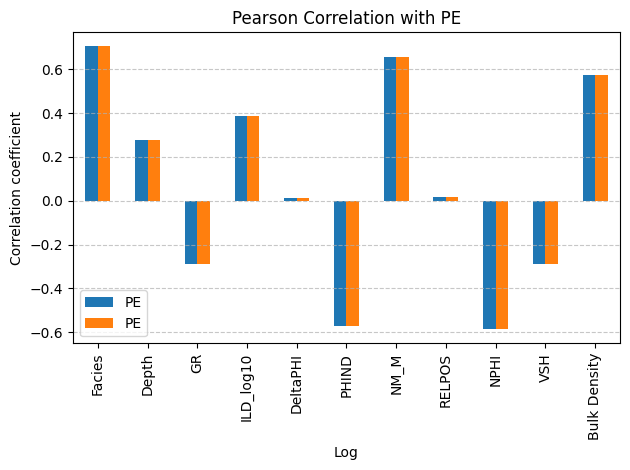

In [29]:
# Plot correlation as bar plot
plt.figure(figsize=(6, 4))
corr["PE"].drop("PE").plot(kind='bar')
plt.title("Pearson Correlation with PE")
plt.ylabel("Correlation coefficient")
plt.xlabel("Log")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"../figures/PE-Pearson's-Coefficient.png", dpi=300, bbox_inches="tight")

plt.show()

# Confusion Matrix

### Split the dataset for train/test

In [30]:
from sklearn.model_selection import train_test_split
#feature_cols = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND']
feature_cols=['Facies',
            'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS'] 
target_col = 'PE'

X = df_pe_present[feature_cols]
y = df_pe_present[target_col]

# 2. Split the data into training and testing sets (80% train, 20% test)
# We use random_state for reproducibility, ensuring the split is the same every time.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. --- Verification ---
# Print the shapes of the resulting datasets to confirm the split.
print("Shape of the full feature set (X):", X.shape)
print("Shape of the full target set (y):", y.shape)
print("-" * 30)
print("Shape of the training features (X_train):", X_train.shape)
print("Shape of the training target (y_train):", y_train.shape)
print("-" * 30)
print("Shape of the testing features (X_test):", X_test.shape)
print("Shape of the testing target (y_test):", y_test.shape)


Shape of the full feature set (X): (3164, 7)
Shape of the full target set (y): (3164,)
------------------------------
Shape of the training features (X_train): (2531, 7)
Shape of the training target (y_train): (2531,)
------------------------------
Shape of the testing features (X_test): (633, 7)
Shape of the testing target (y_test): (633,)


# Distribution of taining and testing data

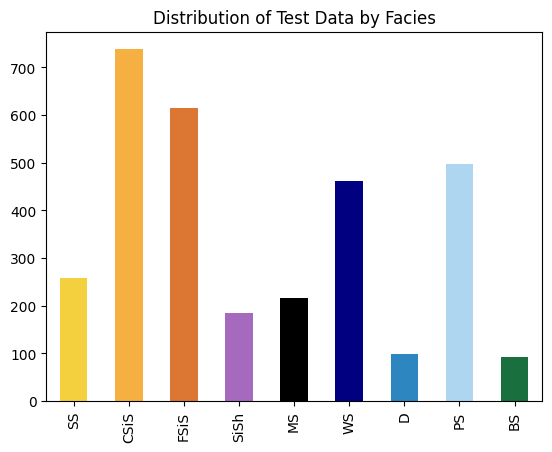

In [32]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
import matplotlib.pyplot as plt
# 1=sandstone  2=c_siltstone   3=f_siltstone # 4=marine_silt_shale 
#5=mudstone 6=wackestone 7=dolomite 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041', '#DC7633','#A569BD',
       '#000000', '#000080', '#2E86C1', '#AED6F1', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_counts = df_pe_present['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

#light_rgb = colors.ListedColormap(facies_colors)
facies_counts.plot(kind='bar',color=facies_colors, 
                   
                   title='Distribution of Test Data by Facies')
plt.savefig(f"../figures/Test-data-distribution.png", dpi=300, bbox_inches="tight")

plt.show()

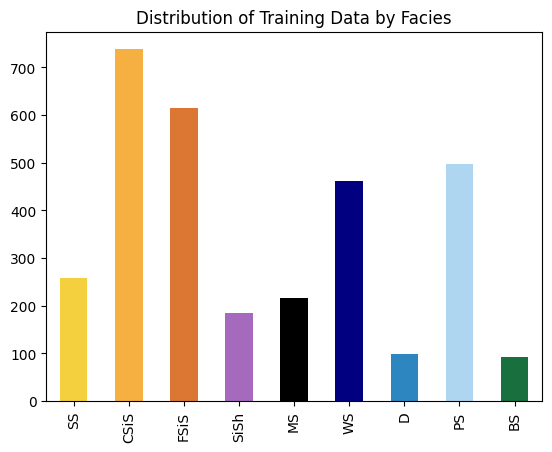

In [93]:


facies_counts = df_pe_present['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

#light_rgb = colors.ListedColormap(facies_colors)
facies_counts.plot(kind='bar',color=facies_colors, title='Distribution of Training Data by Facies')
plt.show()



In [33]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
}

# 2. Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store and print the results
    results[name] = {'RMSE': rmse, 'R2 Score': r2}
    print(f"Results for {name}:")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²) Score: {r2:.4f}\n")

# 3. Print a summary of the results
print("--- Model Comparison ---")
for name, metrics in results.items():
    print(f"{name:>15}: RMSE={metrics['RMSE']:.4f}, R² Score={metrics['R2 Score']:.4f}")


--- Training Random Forest ---
Results for Random Forest:
  Root Mean Squared Error (RMSE): 0.4091
  R-squared (R²) Score: 0.7880

--- Training XGBoost ---
Results for XGBoost:
  Root Mean Squared Error (RMSE): 0.4289
  R-squared (R²) Score: 0.7670

--- Model Comparison ---
  Random Forest: RMSE=0.4091, R² Score=0.7880
        XGBoost: RMSE=0.4289, R² Score=0.7670


In [34]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
    
    # Print results
    print(f"Results for {name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}\n")

# Final summary
print("--- Model Comparison ---")
for name, metrics in results.items():
    print(f"{name:>20}: MSE={metrics['MSE']:.4f}, RMSE={metrics['RMSE']:.4f}, R²={metrics['R2 Score']:.4f}")


--- Training Linear Regression ---
Results for Linear Regression:
  Mean Squared Error (MSE): 0.3048
  Root Mean Squared Error (RMSE): 0.5521
  R-squared (R²): 0.6139

--- Training Decision Tree ---
Results for Decision Tree:
  Mean Squared Error (MSE): 0.2885
  Root Mean Squared Error (RMSE): 0.5371
  R-squared (R²): 0.6346

--- Training Random Forest ---
Results for Random Forest:
  Mean Squared Error (MSE): 0.1674
  Root Mean Squared Error (RMSE): 0.4091
  R-squared (R²): 0.7880

--- Training Gradient Boosting ---
Results for Gradient Boosting:
  Mean Squared Error (MSE): 0.2219
  Root Mean Squared Error (RMSE): 0.4710
  R-squared (R²): 0.7190

--- Training XGBoost ---
Results for XGBoost:
  Mean Squared Error (MSE): 0.1840
  Root Mean Squared Error (RMSE): 0.4289
  R-squared (R²): 0.7670

--- Training Support Vector Regressor ---
Results for Support Vector Regressor:
  Mean Squared Error (MSE): 0.3106
  Root Mean Squared Error (RMSE): 0.5573
  R-squared (R²): 0.6066

--- Model Comp

--- Training Linear Regression ---
Results for Linear Regression:
  Mean Squared Error (MSE): 0.3048
  Root Mean Squared Error (RMSE): 0.5521
  R-squared (R²): 0.6139

--- Training Decision Tree ---
Results for Decision Tree:
  Mean Squared Error (MSE): 0.2885
  Root Mean Squared Error (RMSE): 0.5371
  R-squared (R²): 0.6346

--- Training Random Forest ---
Results for Random Forest:
  Mean Squared Error (MSE): 0.1674
  Root Mean Squared Error (RMSE): 0.4091
  R-squared (R²): 0.7880

--- Training Gradient Boosting ---
Results for Gradient Boosting:
  Mean Squared Error (MSE): 0.2219
  Root Mean Squared Error (RMSE): 0.4710
  R-squared (R²): 0.7190

--- Training XGBoost ---
Results for XGBoost:
  Mean Squared Error (MSE): 0.1840
  Root Mean Squared Error (RMSE): 0.4289
  R-squared (R²): 0.7670

--- Training Support Vector Regressor ---
Results for Support Vector Regressor:
  Mean Squared Error (MSE): 0.3106
  Root Mean Squared Error (RMSE): 0.5573
  R-squared (R²): 0.6066


--- Model Com

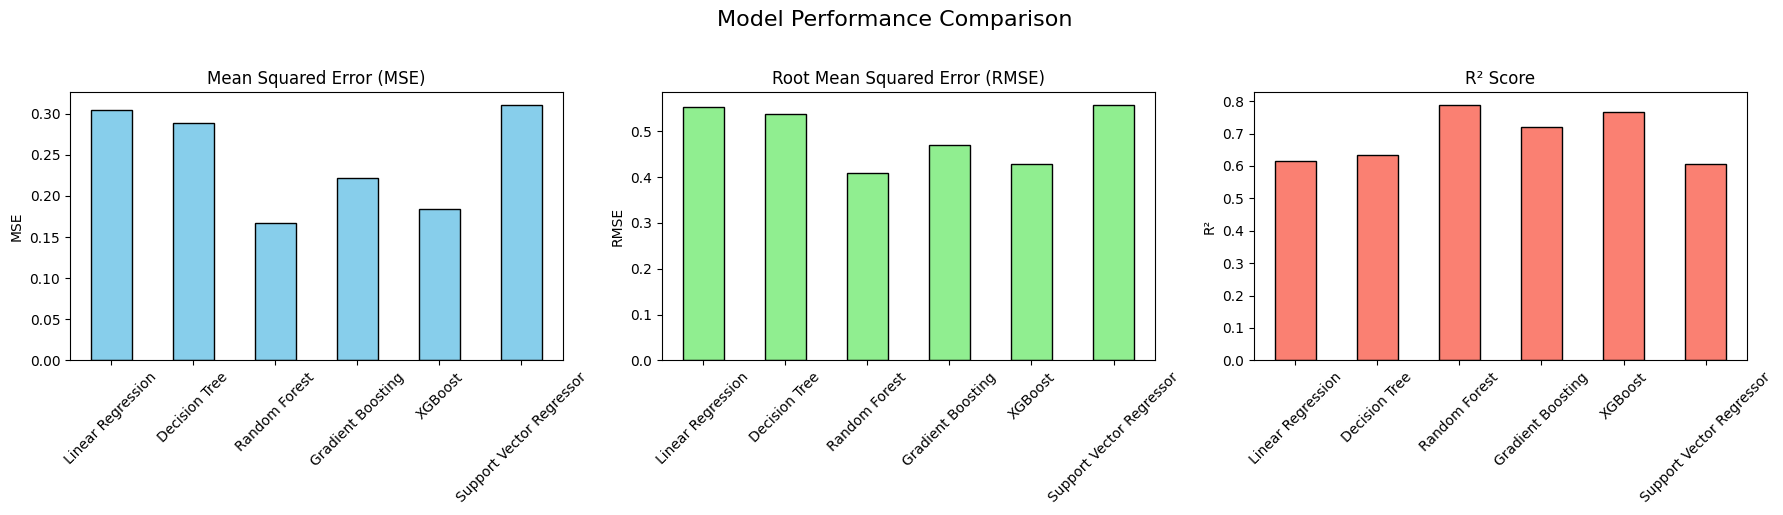

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
    
    # Print results
    print(f"Results for {name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T  # transpose for readability
print("\n--- Model Comparison Table ---")
print(results_df)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MSE plot
results_df["MSE"].plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
axes[0].set_title("Mean Squared Error (MSE)")
axes[0].set_ylabel("MSE")
axes[0].tick_params(axis='x', rotation=45)

# RMSE plot
results_df["RMSE"].plot(kind="bar", ax=axes[1], color="lightgreen", edgecolor="black")
axes[1].set_title("Root Mean Squared Error (RMSE)")
axes[1].set_ylabel("RMSE")
axes[1].tick_params(axis='x', rotation=45)

# R² Score plot
results_df["R2 Score"].plot(kind="bar", ax=axes[2], color="salmon", edgecolor="black")
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=45)

plt.suptitle("Model Performance Comparison", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(f"../figures/Model-performance{model}.png", dpi=300, bbox_inches="tight")

plt.show()


# Predict the missing PE

In [36]:
df_missing_pe.head()

Facies Formation    Well Name   Depth     GR  ILD_log10  DeltaPHI  \
471       3     A1 SH  ALEXANDER D  2887.5  88.71      0.612       6.7   
472       3     A1 SH  ALEXANDER D  2888.0  92.71      0.583      11.0   
473       3     A1 SH  ALEXANDER D  2888.5  94.54      0.579      12.0   
474       3     A1 SH  ALEXANDER D  2889.0  95.31      0.579      11.5   
475       3     A1 SH  ALEXANDER D  2889.5  93.79      0.572      10.3   

      PHIND  PE  NM_M  RELPOS   PHID    NPHI       VSH  Bulk Density  
471  10.605 NaN     1   1.000  7.255  13.955  0.223820      2.475018  
472  12.515 NaN     1   0.974  7.015  18.015  0.235216      2.443503  
473  13.410 NaN     1   0.949  7.410  19.410  0.240430      2.428735  
474  13.750 NaN     1   0.923  8.000  19.500  0.242623      2.423125  
475  13.405 NaN     1   0.897  8.255  18.555  0.238293      2.428818

In [37]:
df_missing_pe.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH',
       'Bulk Density'],
      dtype='object')

In [38]:

# Pick best model (lowest RMSE)
best_model_name = results_df["RMSE"].idxmin()
best_model = models[best_model_name]
print(f"\n✅ Best model selected: {best_model_name}")

#  Apply to missing PE data
# Make sure df_missing_pe has only features (no PE column)
X_missing = df_missing_pe[X_train.columns]   # same feature order as training

# Predict missing PE
df_missing_pe["Predicted_PE"] = best_model.predict(X_missing)

print("\n--- Sample Predictions for Missing PE ---")
print(df_missing_pe.head())

# (Optional) Save results
df_missing_pe.to_csv("predicted_missing_pe.csv", index=False)



✅ Best model selected: Random Forest

--- Sample Predictions for Missing PE ---
     Facies Formation    Well Name   Depth     GR  ILD_log10  DeltaPHI  \
471       3     A1 SH  ALEXANDER D  2887.5  88.71      0.612       6.7   
472       3     A1 SH  ALEXANDER D  2888.0  92.71      0.583      11.0   
473       3     A1 SH  ALEXANDER D  2888.5  94.54      0.579      12.0   
474       3     A1 SH  ALEXANDER D  2889.0  95.31      0.579      11.5   
475       3     A1 SH  ALEXANDER D  2889.5  93.79      0.572      10.3   

      PHIND  PE  NM_M  RELPOS   PHID    NPHI       VSH  Bulk Density  \
471  10.605 NaN     1   1.000  7.255  13.955  0.223820      2.475018   
472  12.515 NaN     1   0.974  7.015  18.015  0.235216      2.443503   
473  13.410 NaN     1   0.949  7.410  19.410  0.240430      2.428735   
474  13.750 NaN     1   0.923  8.000  19.500  0.242623      2.423125   
475  13.405 NaN     1   0.897  8.255  18.555  0.238293      2.428818   

     Predicted_PE  
471       3.77566  
4

/tmp/ipykernel_1921/2356405716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_pe["Predicted_PE"] = best_model.predict(X_missing)


# Final data set after predicting PE

In [39]:
df['PE'].isnull().sum()

np.int64(917)

In [40]:
# If you used Case 1 (in-place replacement):
df.loc[df["PE"].isna(), "PE"] = df_missing_pe["Predicted_PE"].values

# Optional: add a flag to mark which PE values were predicted
df["PE_filled"] = np.where(df.index.isin(df_missing_pe.index), "Predicted", "Original")

# Export to CSV
df.to_csv("final-data.csv", index=False)

print("\n✅ Final dataset saved as 'final-data.csv'")



✅ Final dataset saved as 'final-data.csv'


In [41]:

# Fill missing PE values using the predicted values, aligning by index
df.loc[df_missing_pe.index, "PE"] = df_missing_pe["Predicted_PE"]

# Add a flag column to indicate which PE values were predicted
df["PE_filled"] = np.where(df.index.isin(df_missing_pe.index), "Predicted", "Original")

# Export to CSV
df.to_csv("final-data.csv", index=False)

print("\n✅ Final dataset saved as 'final-data.csv'")



✅ Final dataset saved as 'final-data.csv'


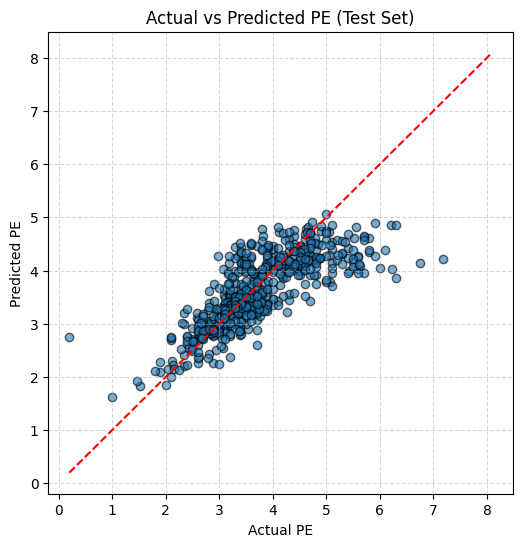

In [43]:

# --- Predict for all data ---
df['PE_pred'] = model.predict(
    df[feature_cols].fillna(df[feature_cols].mean())
)

# --- 1. Scatter Plot: Actual vs Predicted on Test Set ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.title("Actual vs Predicted PE (Test Set)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f"../figures/Actual-Vs-Predicted PE.png", dpi=300, bbox_inches="tight")

plt.show()


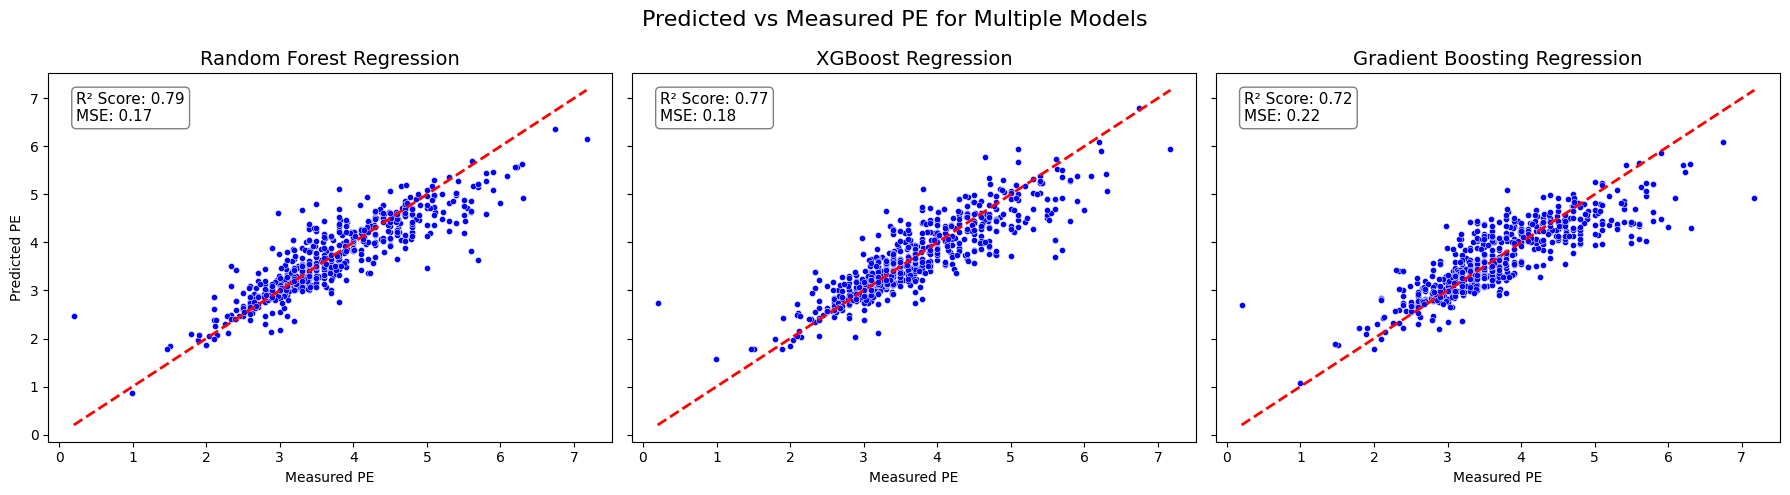

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# List of models to plot
models_to_plot = ["Random Forest", "XGBoost", "Gradient Boosting"]

fig, axes = plt.subplots(1, len(models_to_plot), figsize=(18,5), sharex=True, sharey=True)

for ax, name in zip(axes, models_to_plot):
    model = models[name]
    
    # Predict on test set (or full non-missing PE data if you want)
    y_pred = model.predict(X_test)
    y_true = y_test
    
    # Scatter plot
    sns.scatterplot(x=y_true, y=y_pred, ax=ax, color='blue', s=20)
    
    # Perfect prediction line
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
    
    # Metrics
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Title and text
    ax.set_title(f"{name} Regression", fontsize=14)
    ax.text(0.05, 0.95, f"R² Score: {r2:.2f}\nMSE: {mse:.2f}", transform=ax.transAxes,
            verticalalignment='top', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

axes[0].set_ylabel("Predicted PE")
for ax in axes:
    ax.set_xlabel("Measured PE")

plt.suptitle("Predicted vs Measured PE for Multiple Models", fontsize=16)
plt.tight_layout()
plt.savefig(f"../figures/Predicted Vs measured PE.png", dpi=300, bbox_inches="tight")

plt.show()
